In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

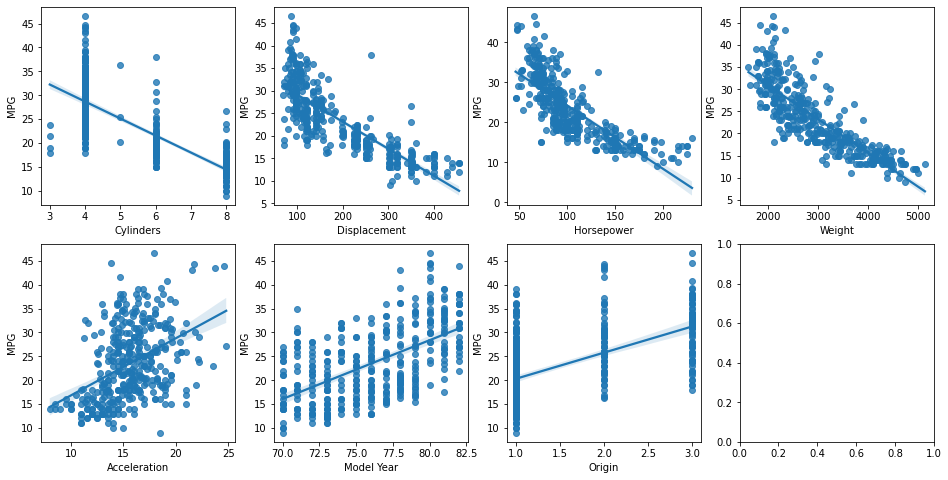

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='MPG', data=dataset, ax=axs[row][col])

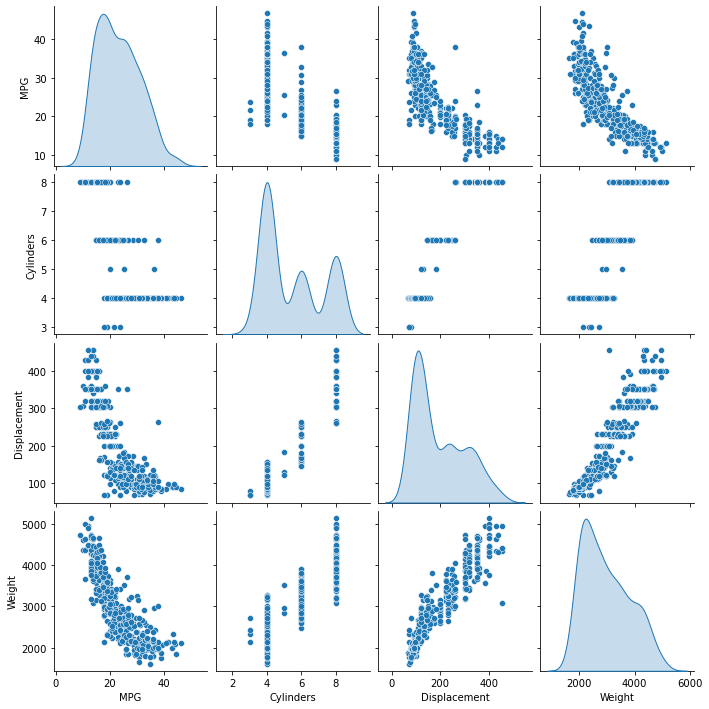

In [7]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

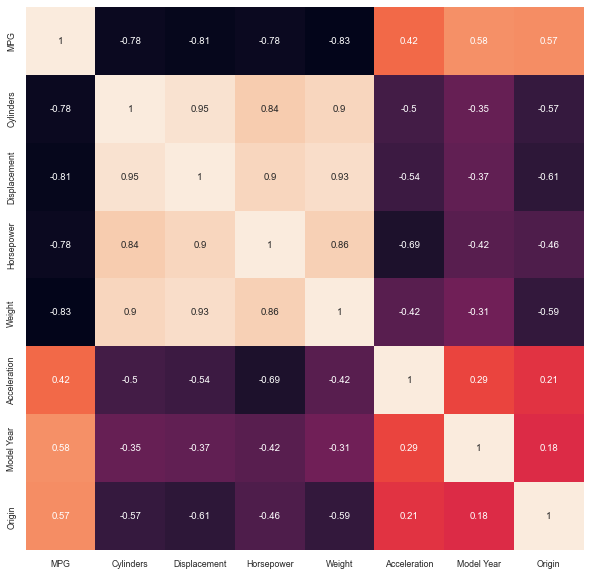

In [8]:
df_corr=dataset.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
x= dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
            'Model Year', 'Origin']]
x

,Cylinders,Displacement,Horsepower,Weight,Model Year,Origin
0,8,307.0,130.0,3504.0,70,1
1,8,350.0,165.0,3693.0,70,1
2,8,318.0,150.0,3436.0,70,1
3,8,304.0,150.0,3433.0,70,1
4,8,302.0,140.0,3449.0,70,1
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,82,1
394,4,97.0,52.0,2130.0,82,2
395,4,135.0,84.0,2295.0,82,1
396,4,120.0,79.0,2625.0,82,1


In [10]:
x=dataset.drop('MPG', axis=1)
x

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [11]:
y=dataset["MPG"]
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 392, dtype: float64

In [12]:
X = x.to_numpy()
y = y.to_numpy()

In [13]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(392, 7, 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [15]:
n_steps = X.shape[1]
n_steps

7

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
N_EPOCHS = 100

In [17]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

print("input_shape => ", n_steps, n_features)
model.summary()

input_shape =>  7 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 50)                9650      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 12)                312       
                                    

In [18]:
model_history=model.fit(x=X_train, y=y_train, epochs = N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 1092.6819 - mse: 1092.6819 - val_loss: 144.1929 - val_mse: 144.1929
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 213.8479 - mse: 213.8479 - val_loss: 154.9075 - val_mse: 154.9075
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 293.4418 - mse: 293.4418 - val_loss: 284.9047 - val_mse: 284.9047
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 167.8409 - mse: 167.8409 - val_loss: 379.2144 - val_mse: 379.2144
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 279.2658 - mse: 279.2658 - val_loss: 111.3586 - val_mse: 111.3586
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 315.1422 - mse: 315.1422 - val_loss: 196.5299 - val_mse: 196.5299
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 284.5209 - mse: 284.5209 - val_loss: 111.5138 - val_mse: 111.5138
Epoch 8/100
10/10 [=====

10/10 [==============================] - 0s 3ms/step - loss: 59.0877 - mse: 59.0877 - val_loss: 31.9503 - val_mse: 31.9503
Epoch 61/100
10/10 [==============================] - 0s 3ms/step - loss: 59.9245 - mse: 59.9245 - val_loss: 32.5615 - val_mse: 32.5615
Epoch 62/100
10/10 [==============================] - 0s 3ms/step - loss: 37.2185 - mse: 37.2185 - val_loss: 50.6076 - val_mse: 50.6076
Epoch 63/100
10/10 [==============================] - 0s 4ms/step - loss: 48.0622 - mse: 48.0622 - val_loss: 21.4051 - val_mse: 21.4051
Epoch 64/100
10/10 [==============================] - 0s 3ms/step - loss: 55.8719 - mse: 55.8719 - val_loss: 27.6488 - val_mse: 27.6488
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 47.4316 - mse: 47.4316 - val_loss: 33.4836 - val_mse: 33.4836
Epoch 66/100
10/10 [==============================] - 0s 3ms/step - loss: 43.1627 - mse: 43.1627 - val_loss: 23.4892 - val_mse: 23.4892
Epoch 67/100
10/10 [==============================] - 0s 3ms/

In [19]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 15.1130 - mse: 15.1130


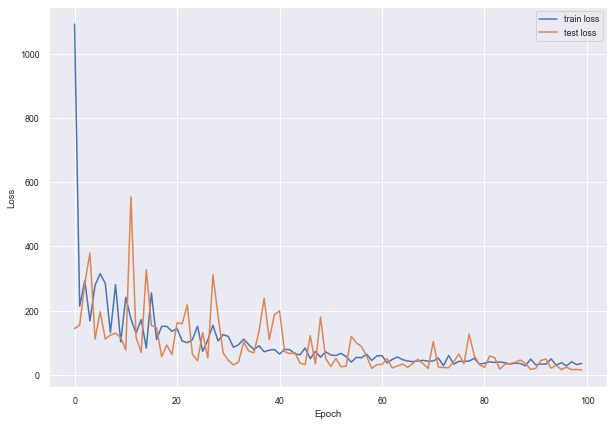

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

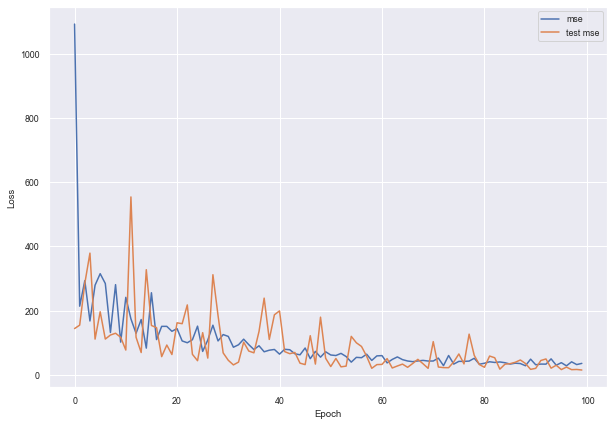

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), model_history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()